In [46]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras import layers
from keras.layers import Dense ,Dropout
from keras.models import Sequential
from keras.layers import Embedding ,SimpleRNN,LSTM
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [47]:
data = pd.read_csv('IMDB Dataset.csv')

In [48]:
data['sentiment']=data['sentiment'].replace(to_replace=['positive','negative'],value=[1,0])

In [49]:
x_train = data.iloc[0:37500,0]
y_train = np.asarray(data.iloc[0:37500,1])

x_test = data.iloc[37500:,0]
y_test = np.asarray(data.iloc[37500:,1])

In [50]:
max_feature = 10000
maxlen = 300
batch_size = 32
time_steps_to_unroll=300

In [51]:
tokenizer = Tokenizer(num_words=max_feature)

In [52]:
tokenizer.fit_on_texts(x_train)  #Builds the word index
#Turns strings into lists of integer indices
train_sequences = tokenizer.texts_to_sequences(x_train)
train_word_index = tokenizer.word_index

In [53]:
'''Transforming Training data which is in text into a sequence of integer. '''
tokenizer.fit_on_texts(x_test)  #Builds the word index
#Turns strings into lists of integer indices
test_sequences = tokenizer.texts_to_sequences(x_test)
test_word_index = tokenizer.word_index #Return word index for each word

In [54]:
'''This function transforms a list of sequences (lists of integers) 
into a 2D Numpy array.'''
x_train = sequence.pad_sequences(train_sequences,maxlen=maxlen)
x_test = sequence.pad_sequences(test_sequences,maxlen=maxlen)

In [55]:
glove_dir = 'C:/Users/A-Team/Desktop/Datasets/IMDB'

embedding_index = {}
f=open(os.path.join(glove_dir,'glove.6B.300d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()

In [56]:
#Training data embedding matrix
embedding_dim=300
embedding_matrix_train = np.zeros((max_feature,embedding_dim))
for word, i in train_word_index.items():
    if i<max_feature:
        embedding_vector_train = embedding_index.get(word)
        if embedding_vector_train is not None:
            embedding_matrix_train[i] = embedding_vector_train

array([0., 1.], dtype=float32)

In [61]:
model = Sequential()
model.add(Embedding(max_feature,embedding_dim,input_length=time_steps_to_unroll,weights=[embedding_matrix_train]))
model.add(LSTM(embedding_dim))
model.add(Dropout(0.5))
model.add(layers.Dense(units = 1,activation = 'sigmoid'))

model.layers[0].trainable = False
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['acc'])
history = model.fit(x_test,y_test,epochs = 20,batch_size = 256,validation_split = 0.2)
model.save('model.h5')

Train on 10000 samples, validate on 2500 samples
Epoch 1/20
10000/10000 [==============================] - 254s 25ms/step - loss: 0.6845 - acc: 0.5530 - val_loss: 0.7310 - val_acc: 0.5248
Epoch 2/20
10000/10000 [==============================] - 216s 22ms/step - loss: 0.6610 - acc: 0.5973 - val_loss: 0.6610 - val_acc: 0.6028
Epoch 3/20
10000/10000 [==============================] - 212s 21ms/step - loss: 0.6458 - acc: 0.6339 - val_loss: 0.7168 - val_acc: 0.5492
Epoch 4/20
10000/10000 [==============================] - 208s 21ms/step - loss: 0.6461 - acc: 0.6236 - val_loss: 0.6394 - val_acc: 0.6204
Epoch 5/20
10000/10000 [==============================] - 207s 21ms/step - loss: 0.6181 - acc: 0.6574 - val_loss: 0.6302 - val_acc: 0.6336
Epoch 6/20
10000/10000 [==============================] - 209s 21ms/step - loss: 0.5923 - acc: 0.6832 - val_loss: 0.6226 - val_acc: 0.6444
Epoch 7/20
10000/10000 [==============================] - 207s 21ms/step - loss: 0.5668 - acc: 0.7091 - val_loss: 0.5

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)



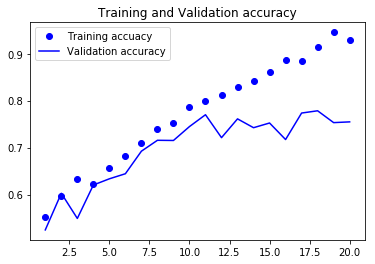

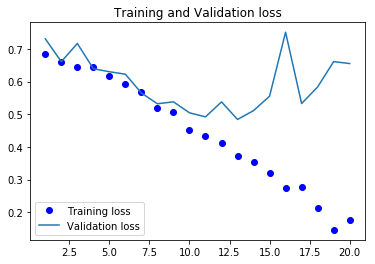

In [63]:
plt.plot(epochs,acc,'bo',label='Training accuacy')
plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [64]:
results=model.predict(x_test,batch_size=128)


In [65]:
predicted_labels = []
for i in range(len(results)):
    if(results[i]<0.50):
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)
    

In [66]:
boolean_results = np.count_nonzero(predicted_labels == y_test)

In [67]:
Testing_accuracy = boolean_results/y_test.shape[0]

In [68]:
Testing_accuracy

0.92784

In [69]:
model.evaluate(x_test,y_test,batch_size=128)

12500/12500 [==============================] - 119s 9ms/step


[0.2136788285446167, 0.9278400001144409]

In [70]:
model.metrics_names

['loss', 'acc']